In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# Ensuring proper dtypes of each features

In [4]:
df['booking_complete'] = df['booking_complete'].astype('object') 
df['wants_extra_baggage'] = df['wants_extra_baggage'].astype('object') 
df['wants_in_flight_meals'] = df['wants_in_flight_meals'].astype('object') 
df['wants_preferred_seat'] = df['wants_preferred_seat'].astype('object')

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts()/len(df)*100)

Internet    88.764
Mobile      11.236
Name: sales_channel, dtype: float64
RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: trip_type, dtype: float64
Mon    16.204
Wed    15.348
Tue    15.346
Thu    14.848
Fri    13.522
Sun    13.108
Sat    11.624
Name: flight_day, dtype: float64
AKLKUL    5.360
PENTPE    1.848
MELSGN    1.684
ICNSIN    1.602
DMKKIX    1.488
          ...  
LBUTPE    0.002
CXRMEL    0.002
DELKBR    0.002
KOSSYD    0.002
MRUXIY    0.002
Name: route, Length: 799, dtype: float64
Australia               35.744
Malaysia                14.348
South Korea              9.118
Japan                    7.770
China                    6.774
                         ...  
Panama                   0.002
Tonga                    0.002
Tanzania                 0.002
Bulgaria                 0.002
Svalbard & Jan Mayen     0.002
Name: booking_origin, Length: 104, dtype: float64
1    66.878
0    33.122
Name: wants_extra_baggage, dtype: float64
0    70.304
1    29.696
Na

In [6]:
df.quantile(1)

num_passengers       9.0
purchase_lead      867.0
length_of_stay     778.0
flight_hour         23.0
flight_duration      9.5
Name: 1.0, dtype: float64

* We do not proceed to remove outliers with iqr as it removes nearly 20% of the data

In [7]:
df = df[df['length_of_stay']<400]
df = df[df['purchase_lead']<450]

In [8]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [9]:
df.quantile(1)

num_passengers       9.0
purchase_lead      446.0
length_of_stay     399.0
flight_hour         23.0
flight_duration      9.5
Name: 1.0, dtype: float64

In [10]:
df.shape

(49958, 14)

In [11]:
# Extracting routes for booking_origin columns which are null
bodf = df[df['booking_origin']==('(not set)')]
ln = len(bodf['route'].value_counts())
bl = []
bl.append(bodf['route'].value_counts().index)

bll=[]
for i in range(0,ln):
    bll.append(bl[0][i])
    
# Output as a proper list
print(bll)

['DPSPVG', 'AKLKUL', 'DPSPEK', 'DMKPER', 'IKASIN', 'MELSGN', 'MYYPER', 'HKTPVG', 'PENTPE', 'PERTPE', 'CTUPEN', 'HYDSYD', 'MAAOOL', 'COKOOL', 'PVGSGN', 'CEBMEL', 'CTUMEL', 'COKMEL', 'JOGKIX', 'KBRPEK', 'LGKPVG', 'PVGTGG', 'BKIICN', 'CGKHND', 'CGKICN', 'CGKKIX', 'CKGMRU', 'CTUSYD', 'DPSHGH', 'HGHHKT', 'HGHSIN', 'HGHTRZ', 'HNDPEN', 'MNLSYD', 'ICNPEN', 'ICNPER', 'PEKTRZ', 'IKAMNL', 'KTMTPE', 'MELPEK', 'MELPVG', 'HGHLGK', 'MELTPE', 'MELXIY', 'OOLPEK', 'PEKSYD', 'PERTRZ', 'HKTMEL', 'PVGSUB', 'TRZXIY', 'DPSICN', 'DELOOL', 'SUBTPE', 'DACMEL', 'CKGTRZ', 'PVGSIN', 'CTUDPS', 'PEKPEN']


In [12]:
l=[]

for route in bodf['route'].value_counts().index:
    l.append(df[df['route']==route]['booking_origin'].mode())

In [13]:
# Converting to 1D list

l1=[]
for i in range (0,ln):
    l1.append(l[i][0])

len(l1)

58

In [14]:
# Creating mapping dataframe

edf = pd.DataFrame({'route': bll, 'booking_origin': l1})
edf.head()

,route,booking_origin
0,DPSPVG,China
1,AKLKUL,Malaysia
2,DPSPEK,China
3,DMKPER,Australia
4,IKASIN,Singapore


In [15]:
# converting ('not set') to null
import numpy as np
df['booking_origin'] = df['booking_origin'].replace('(not set)', np.nan)

In [16]:
# Create a dictionary mapping country codes to country names
country_mapping = edf.set_index('route')['booking_origin'].to_dict()

# Fill missing values in 'country' column using the mapping
df['booking_origin'] = df['booking_origin'].fillna(df['route'].map(country_mapping))

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

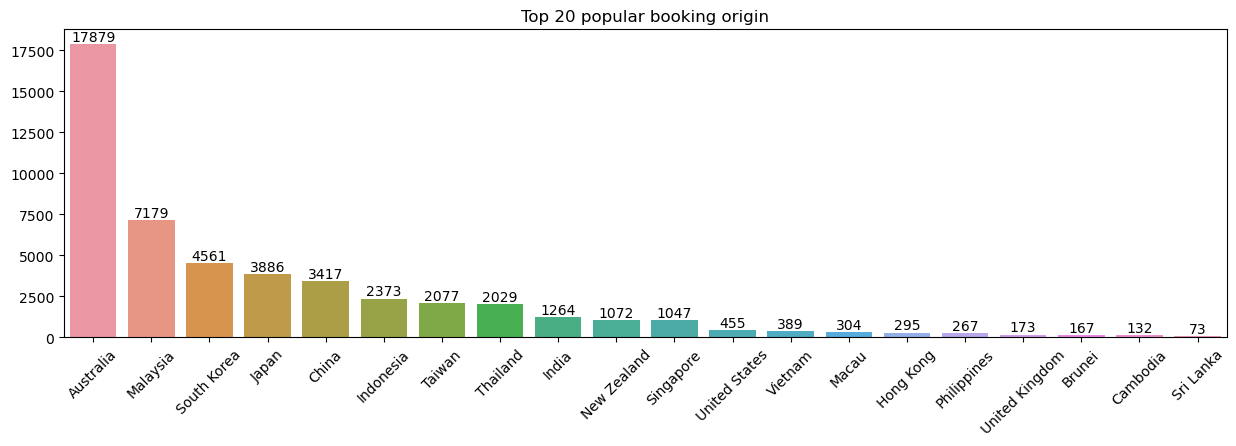

In [19]:
plt.figure(figsize=(15,4))
ax = sns.barplot(y = df['booking_origin'].value_counts().head(20).values, x = df['booking_origin'].value_counts().head(20).index)
plt.bar_label(ax.containers[0])
plt.title('Top 20 popular booking origin')
plt.xticks(rotation = 45)
plt.show()

# Removing rows having booking_origin having only 1 entry
# Feature Engineering continent

In [20]:
l=[]

l.append(df['booking_origin'].value_counts().values)

In [21]:
l

[array([17879,  7179,  4561,  3886,  3417,  2373,  2077,  2029,  1264,
         1072,  1047,   455,   389,   304,   295,   267,   173,   167,
          132,    73,    59,    58,    57,    57,    50,    46,    44,
           42,    40,    36,    36,    32,    27,    25,    18,    17,
           15,    14,    12,    12,     9,     9,     9,     9,     9,
            9,     8,     8,     8,     8,     8,     7,     7,     7,
            7,     6,     6,     6,     5,     5,     5,     4,     4,
            4,     3,     3,     3,     3,     2,     2,     2,     2,
            2,     2,     2,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1], dtype=int64)]

In [22]:
# Top 25 countries with over 1+ bookings

df['booking_origin'].value_counts().index[df['booking_origin'].value_counts().values >1]

Index(['Australia', 'Malaysia', 'South Korea', 'Japan', 'China', 'Indonesia',
       'Taiwan', 'Thailand', 'India', 'New Zealand', 'Singapore',
       'United States', 'Vietnam', 'Macau', 'Hong Kong', 'Philippines',
       'United Kingdom', 'Brunei', 'Cambodia', 'Sri Lanka', 'France', 'Italy',
       'Canada', 'Germany', 'Myanmar (Burma)', 'Netherlands', 'Mauritius',
       'United Arab Emirates', 'Nepal', 'Saudi Arabia', 'Bangladesh', 'Russia',
       'Spain', 'Laos', 'Switzerland', 'Chile', 'Qatar', 'Iran', 'Sweden',
       'Réunion', 'Ireland', 'Mexico', 'Kuwait', 'Oman', 'Brazil', 'Turkey',
       'Czech Republic', 'Mongolia', 'Finland', 'Poland', 'Austria', 'Denmark',
       'Greece', 'Maldives', 'Belgium', 'Portugal', 'Argentina',
       'New Caledonia', 'Ukraine', 'Norway', 'Bahrain', 'Peru', 'Colombia',
       'Romania', 'South Africa', 'Kenya', 'Kazakhstan', 'Hungary', 'Israel',
       'Slovenia', 'Solomon Islands', 'Guam', 'Timor-Leste', 'Cyprus',
       'Croatia', 'Tunisia']

In [23]:
# Mapping dictionary for continents
continent_mapping = {
    'Australia': 'Oceania',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Indonesia': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'India': 'Asia',
    'New Zealand': 'Oceania',
    'Singapore': 'Asia',
    'United States': 'North America',
    'Vietnam': 'Asia',
    'Macau': 'Asia',
    'Hong Kong': 'Asia',
    'Philippines': 'Asia',
    'United Kingdom': 'Europe',
    'Brunei': 'Asia',
    'Cambodia': 'Asia',
    'Sri Lanka': 'Asia',
    'France': 'Europe',
    'Italy': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Myanmar (Burma)': 'Asia',
    'Netherlands': 'Europe',
    'Mauritius': 'Africa',
    'United Arab Emirates': 'Asia',
    'Nepal': 'Asia',
    'Saudi Arabia': 'Asia',
    'Bangladesh': 'Asia',
    'Russia': 'Europe',
    'Spain': 'Europe',
    'Laos': 'Asia',
    'Switzerland': 'Europe',
    'Chile': 'South America',
    'Qatar': 'Asia',
    'Iran': 'Asia',
    'Sweden': 'Europe',
    'Réunion': 'Africa',
    'Ireland': 'Europe',
    'Mexico': 'North America',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'Brazil': 'South America',
    'Turkey': 'Asia',
    'Czech Republic': 'Europe',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Finland': 'Europe',
    'Poland': 'Europe',
    'Austria': 'Europe',
    'Denmark': 'Europe',
    'Greece': 'Europe',
    'Belgium': 'Europe',
    'Portugal': 'Europe',
    'Argentina': 'South America',
    'New Caledonia': 'Oceania',
    'Ukraine': 'Europe',
    'Bahrain': 'Asia',
    'Norway': 'Europe',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Romania': 'Europe',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    'Kazakhstan': 'Asia',
    'Hungary': 'Europe',
    'Israel': 'Asia',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Guam': 'Oceania',
    'Timor-Leste': 'Asia',
    'Cyprus': 'Asia',
    'Croatia': 'Europe',
    'Tunisia': 'Africa'
}

# Create a new column for continents based on the mapping dictionary
df['continent'] = df['booking_origin'].map(continent_mapping)

# Display the updated DataFrame

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,continent
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Oceania
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Oceania
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Asia
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Oceania
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Asia


In [24]:
df = df[df['continent'].isna()==False]
print(df.shape)
df.head()

(49931, 15)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,continent
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Oceania
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Oceania
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Asia
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Oceania
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Asia


In [25]:
df['continent'].value_counts(normalize=True)*100

Asia             59.630290
Oceania          37.974405
Europe            1.143578
North America     1.043440
Africa            0.128177
South America     0.080111
Name: continent, dtype: float64

- merging all non asian continents

In [26]:
continent_mapping1 = {
    'Oceania': 'Non Asian',
    'Europe': 'Non Asian',
    'North America': 'Non Asian',
    'South America': 'Non Asian',
    'Africa': 'Non Asian',
    'Asia': 'Asian',
    }

In [27]:
df['continent'] = df['continent'].map(continent_mapping1)

In [28]:
df['continent'].value_counts(normalize=True)*100

Asian        59.63029
Non Asian    40.36971
Name: continent, dtype: float64

In [29]:
round((59.622-40.377),2)

19.24

In [30]:
df.shape

(49931, 15)

* The continent column is better balanced

In [31]:
df = df[df['trip_type']=='RoundTrip']
df.shape

(49429, 15)

- Featues wants_in_flight_meals is the only categorical feature which is balanced
- We will proceed to model with this data, further more we shall balance the data with smote

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,continent
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Non Asian
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Non Asian
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Asian
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Non Asian
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Asian


- Keeping only the necessary columns for modeling

In [33]:
new_column_order = ['num_passengers', 'sales_channel', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration',
                    'continent', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 
                    'booking_complete']
df = df[new_column_order]

In [34]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,continent,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2,Internet,262,19,7,Sat,5.52,Non Asian,1,0,0,0
1,1,Internet,112,20,3,Sat,5.52,Non Asian,0,0,0,0
2,2,Internet,243,22,17,Wed,5.52,Asian,1,1,0,0
3,1,Internet,96,31,4,Sat,5.52,Non Asian,0,0,1,0
4,2,Internet,68,22,15,Wed,5.52,Asian,1,0,1,0


In [35]:
df['continent'].replace('Asian',1, inplace=True)
df['continent'].replace('Non Asian',0, inplace=True)

In [36]:
df['continent'] = df['continent'].astype('object')

In [37]:
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,continent,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2,Internet,262,19,7,Sat,5.52,0,1,0,0,0
1,1,Internet,112,20,3,Sat,5.52,0,0,0,0,0
2,2,Internet,243,22,17,Wed,5.52,1,1,1,0,0
3,1,Internet,96,31,4,Sat,5.52,0,0,0,1,0
4,2,Internet,68,22,15,Wed,5.52,1,1,0,1,0


In [38]:
df.shape

(49429, 12)

# Splitting into categorical and numerical features

# Categorical

In [39]:
cdf = df.select_dtypes(include='object')
cdf.head(2)

,sales_channel,flight_day,continent,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,Internet,Sat,0,1,0,0,0
1,Internet,Sat,0,0,0,0,0


In [40]:
cdf.shape

(49429, 7)

In [41]:
cdf.isna().sum()

sales_channel            0
flight_day               0
continent                0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
booking_complete         0
dtype: int64

In [42]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49429 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sales_channel          49429 non-null  object
 1   flight_day             49429 non-null  object
 2   continent              49429 non-null  object
 3   wants_extra_baggage    49429 non-null  object
 4   wants_preferred_seat   49429 non-null  object
 5   wants_in_flight_meals  49429 non-null  object
 6   booking_complete       49429 non-null  object
dtypes: object(7)
memory usage: 3.0+ MB


# Numerical

In [43]:
ndf = df.select_dtypes(include='number')

In [44]:
ndf.shape

(49429, 5)

In [45]:
ndf.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
0,2,262,19,7,5.52
1,1,112,20,3,5.52
2,2,243,22,17,5.52
3,1,96,31,4,5.52
4,2,68,22,15,5.52


In [46]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
pt = PowerTransformer()
sc = StandardScaler()

In [47]:
ndf = pd.DataFrame(sc.fit_transform(ndf), columns= ndf.columns)

In [48]:
ndf.std()

num_passengers     1.00001
purchase_lead      1.00001
length_of_stay     1.00001
flight_hour        1.00001
flight_duration    1.00001
dtype: float64

In [49]:
ndf.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
0,0.400187,1.974530,-0.120059,-0.381036,-1.168748
1,-0.579645,0.304666,-0.089340,-1.120105,-1.168748
2,0.400187,1.763014,-0.027903,1.466635,-1.168748
3,-0.579645,0.126548,0.248565,-0.935338,-1.168748
4,0.400187,-0.185160,-0.027903,1.097101,-1.168748


In [50]:
ndf.shape

(49429, 5)

# Joining both data frames

In [51]:
jdf = pd.concat(
    [
        ndf.reset_index(drop=True),
        cdf.reset_index(drop=True),
    ],
    axis=1,
    ignore_index=True,
)

concatenated_dataframes_columns = [
    list(ndf.columns),
    list(cdf.columns),
]
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

jdf.columns = flatten(concatenated_dataframes_columns)

In [52]:
jdf.isna().sum()

num_passengers           0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_duration          0
sales_channel            0
flight_day               0
continent                0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
booking_complete         0
dtype: int64

In [53]:
jdf.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,sales_channel,flight_day,continent,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,0.400187,1.974530,-0.120059,-0.381036,-1.168748,Internet,Sat,0,1,0,0,0
1,-0.579645,0.304666,-0.089340,-1.120105,-1.168748,Internet,Sat,0,0,0,0,0
2,0.400187,1.763014,-0.027903,1.466635,-1.168748,Internet,Wed,1,1,1,0,0
3,-0.579645,0.126548,0.248565,-0.935338,-1.168748,Internet,Sat,0,0,0,1,0
4,0.400187,-0.185160,-0.027903,1.097101,-1.168748,Internet,Wed,1,1,0,1,0


In [54]:
fdf = pd.get_dummies(data=jdf, drop_first=True)

In [55]:
fdf.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_duration', 'sales_channel_Mobile', 'flight_day_Mon',
       'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue',
       'flight_day_Wed', 'continent_1', 'wants_extra_baggage_1',
       'wants_preferred_seat_1', 'wants_in_flight_meals_1',
       'booking_complete_1'],
      dtype='object')

In [56]:
# List of column names to convert to 'object' data type
columns_to_convert = ['flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun',
       'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed', 'continent_1',
       'wants_extra_baggage_1', 'wants_preferred_seat_1',
       'wants_in_flight_meals_1', 'booking_complete_1']

# Convert specific columns to 'object' data type using a for loop
for column in columns_to_convert:
    fdf[column] = fdf[column].astype(object)

In [57]:
fdf.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,sales_channel_Mobile,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,continent_1,wants_extra_baggage_1,wants_preferred_seat_1,wants_in_flight_meals_1,booking_complete_1
0,0.400187,1.974530,-0.120059,-0.381036,-1.168748,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.579645,0.304666,-0.089340,-1.120105,-1.168748,0,0,1,0,0,0,0,0,0,0,0,0
2,0.400187,1.763014,-0.027903,1.466635,-1.168748,0,0,0,0,0,0,1,1,1,1,0,0
3,-0.579645,0.126548,0.248565,-0.935338,-1.168748,0,0,1,0,0,0,0,0,0,0,1,0
4,0.400187,-0.185160,-0.027903,1.097101,-1.168748,0,0,0,0,0,0,1,1,1,0,1,0


In [58]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49429 entries, 0 to 49428
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           49429 non-null  float64
 1   purchase_lead            49429 non-null  float64
 2   length_of_stay           49429 non-null  float64
 3   flight_hour              49429 non-null  float64
 4   flight_duration          49429 non-null  float64
 5   sales_channel_Mobile     49429 non-null  uint8  
 6   flight_day_Mon           49429 non-null  object 
 7   flight_day_Sat           49429 non-null  object 
 8   flight_day_Sun           49429 non-null  object 
 9   flight_day_Thu           49429 non-null  object 
 10  flight_day_Tue           49429 non-null  object 
 11  flight_day_Wed           49429 non-null  object 
 12  continent_1              49429 non-null  object 
 13  wants_extra_baggage_1    49429 non-null  object 
 14  wants_preferred_seat_1

In [59]:
import seaborn as sns

<Axes: >

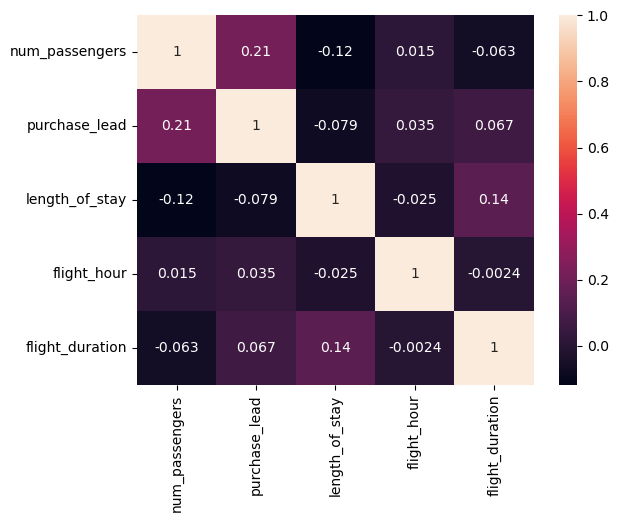

In [60]:
sns.heatmap(df.corr(), annot=True)

# Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = fdf.drop(['booking_complete_1'], axis =1)
y = fdf['booking_complete_1']

In [63]:
y.value_counts()

0    41986
1     7443
Name: booking_complete_1, dtype: int64

In [64]:
y = pd.get_dummies(data=y, drop_first=True)

In [65]:
y.columns[0]

1

In [66]:
y = y.rename(columns={y.columns[0]: 'booking_origin'})

In [67]:
y.value_counts()

booking_origin
0                 41986
1                  7443
dtype: int64

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state= 100)

In [69]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(34600, 16) (34600, 1) (14829, 16) (14829, 1)


# Model

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
from sklearn.metrics import classification_report

In [72]:
from sklearn.metrics import cohen_kappa_score

In [73]:
model_lr = lr.fit(xtrain,ytrain)
y_pred_train_lr = model_lr.predict(xtrain)

print(classification_report(ytrain,y_pred_train_lr))

kappa_train_lr = cohen_kappa_score(ytrain, y_pred_train_lr)

# Print the kappa score
print("Cohen's kappa score:", kappa_train_lr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     29414
           1       0.00      0.00      0.00      5186

    accuracy                           0.85     34600
   macro avg       0.43      0.50      0.46     34600
weighted avg       0.72      0.85      0.78     34600

Cohen's kappa score: 0.0


In [74]:
model_lr = lr.fit(xtrain,ytrain)
y_pred_test_lr = model_lr.predict(xtest)

print(classification_report(ytest,y_pred_test_lr))

kappa_test_lr = cohen_kappa_score(ytest, y_pred_test_lr)

# Print the kappa score
print("Cohen's kappa score:", kappa_test_lr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12572
           1       0.00      0.00      0.00      2257

    accuracy                           0.85     14829
   macro avg       0.42      0.50      0.46     14829
weighted avg       0.72      0.85      0.78     14829

Cohen's kappa score: 0.0


- Class imbalance

In [75]:
fdf.head(2)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,sales_channel_Mobile,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,continent_1,wants_extra_baggage_1,wants_preferred_seat_1,wants_in_flight_meals_1,booking_complete_1
0,0.400187,1.974530,-0.120059,-0.381036,-1.168748,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.579645,0.304666,-0.089340,-1.120105,-1.168748,0,0,1,0,0,0,0,0,0,0,0,0


In [76]:
fdf.shape

(49429, 17)

# SMOTENC
* Using SMOTENC to handle categorical freatures while balancing the data

In [77]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[5,6,7,8,9,10,11,12,13,14], random_state=100)
x_resampled, y_resampled = smote_nc.fit_resample(x, y)

In [78]:
y_resampled.value_counts()

booking_origin
0                 41986
1                 41986
dtype: int64

In [79]:
x_resampled['wants_preferred_seat_1'].value_counts()

0    58562
1    25410
Name: wants_preferred_seat_1, dtype: int64

In [80]:
x_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83972 entries, 0 to 83971
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_passengers           83972 non-null  float64
 1   purchase_lead            83972 non-null  float64
 2   length_of_stay           83972 non-null  float64
 3   flight_hour              83972 non-null  float64
 4   flight_duration          83972 non-null  float64
 5   sales_channel_Mobile     83972 non-null  uint8  
 6   flight_day_Mon           83972 non-null  object 
 7   flight_day_Sat           83972 non-null  object 
 8   flight_day_Sun           83972 non-null  object 
 9   flight_day_Thu           83972 non-null  object 
 10  flight_day_Tue           83972 non-null  object 
 11  flight_day_Wed           83972 non-null  object 
 12  continent_1              83972 non-null  object 
 13  wants_extra_baggage_1    83972 non-null  object 
 14  wants_preferred_seat_1

# smoted df

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state= 100)

In [82]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(58780, 16) (58780, 1) (25192, 16) (25192, 1)


# Logistic Regression

In [83]:
model_lr = lr.fit(xtrain,ytrain)
y_pred_train_lr = model_lr.predict(xtrain)

print(classification_report(ytrain,y_pred_train_lr))

kappa_train_lr = cohen_kappa_score(ytrain, y_pred_train_lr)

# Print the kappa score
print("Cohen's kappa score:", kappa_train_lr)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67     29466
           1       0.67      0.79      0.73     29314

    accuracy                           0.70     58780
   macro avg       0.71      0.70      0.70     58780
weighted avg       0.71      0.70      0.70     58780

Cohen's kappa score: 0.40228784498350645


In [84]:
model_lr = lr.fit(xtrain,ytrain)
y_pred_test_lr = model_lr.predict(xtest)

print(classification_report(ytest,y_pred_test_lr))

kappa_test_lr = cohen_kappa_score(ytest, y_pred_test_lr)

# Print the kappa score
print("Cohen's kappa score:", kappa_test_lr)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     12520
           1       0.67      0.79      0.73     12672

    accuracy                           0.70     25192
   macro avg       0.71      0.70      0.70     25192
weighted avg       0.71      0.70      0.70     25192

Cohen's kappa score: 0.3995330679392458


In [85]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Decission Tree

In [86]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
y_pred_train_dt = model_dt.predict(xtrain)

print(classification_report(ytrain,y_pred_train_dt))

kappa_train_dt = cohen_kappa_score(ytrain, y_pred_train_dt)

# Print the kappa score
print("Cohen's kappa score:", kappa_train_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29466
           1       1.00      1.00      1.00     29314

    accuracy                           1.00     58780
   macro avg       1.00      1.00      1.00     58780
weighted avg       1.00      1.00      1.00     58780

Cohen's kappa score: 0.9997618220521091


In [87]:
model_dt = dt.fit(xtrain,ytrain)
y_pred_test_dt = model_dt.predict(xtest)

print(classification_report(ytest, y_pred_test_dt))

kappa_test_dt = cohen_kappa_score(ytest, y_pred_test_dt)

# Print the kappa score
print("Cohen's kappa score:", kappa_test_dt)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     12520
           1       0.82      0.83      0.83     12672

    accuracy                           0.83     25192
   macro avg       0.83      0.83      0.83     25192
weighted avg       0.83      0.83      0.83     25192

Cohen's kappa score: 0.6545333297461996


# Random Forest

In [88]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
y_pred_train_rf = model_rf.predict(xtrain)

print(classification_report(ytrain,y_pred_train_rf))

kappa_train_rf = cohen_kappa_score(ytrain, y_pred_train_rf)

# Print the kappa score
print("Cohen's kappa score:", kappa_train_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29466
           1       1.00      1.00      1.00     29314

    accuracy                           1.00     58780
   macro avg       1.00      1.00      1.00     58780
weighted avg       1.00      1.00      1.00     58780

Cohen's kappa score: 0.9997618221359351


In [89]:
y_pred_test_rf = model_rf.predict(xtest)

print(classification_report(ytest, y_pred_test_rf))

kappa_test_rf = cohen_kappa_score(ytest, y_pred_test_rf)

# Print the kappa score
print("Cohen's kappa score:", kappa_test_rf)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12520
           1       0.91      0.87      0.89     12672

    accuracy                           0.89     25192
   macro avg       0.89      0.89      0.89     25192
weighted avg       0.89      0.89      0.89     25192

Cohen's kappa score: 0.7780734578890003


# Adaboost

In [90]:
ab = AdaBoostClassifier()
model_ab = ab.fit(xtrain,ytrain)
y_pred_train_ab = model_ab.predict(xtrain)

print('For AdaBoost Train data', classification_report(ytrain,y_pred_train_ab))

kappa_train_ab = cohen_kappa_score(ytrain, y_pred_train_ab)

# Print the kappa score
print("Cohen's kappa score for AdaBoost Train data:", kappa_train_ab)

For AdaBoost Train data               precision    recall  f1-score   support

           0       0.77      0.73      0.75     29466
           1       0.74      0.78      0.76     29314

    accuracy                           0.76     58780
   macro avg       0.76      0.76      0.76     58780
weighted avg       0.76      0.76      0.76     58780

Cohen's kappa score for AdaBoost Train data: 0.5115865336497504


In [91]:
y_pred_test_ab = model_ab.predict(xtest)

print('For AdaBoost Test data', classification_report(ytest,y_pred_test_ab))

kappa = cohen_kappa_score(ytest, y_pred_test_ab)

# Print the kappa score
print("Cohen's kappa score for AdaBoost Test data:", kappa)

For AdaBoost Test data               precision    recall  f1-score   support

           0       0.76      0.73      0.74     12520
           1       0.74      0.77      0.75     12672

    accuracy                           0.75     25192
   macro avg       0.75      0.75      0.75     25192
weighted avg       0.75      0.75      0.75     25192

Cohen's kappa score for AdaBoost Test data: 0.4964619989212463


# Knn

In [92]:
kn = KNeighborsClassifier()
model_kn = kn.fit(xtrain,ytrain)
y_pred_train_kn = model_kn.predict(xtrain)

print('For KNN Train data', classification_report(ytrain,y_pred_train_kn))

kappa_train_kn = cohen_kappa_score(ytrain, y_pred_train_kn)

# Print the kappa score
print("Cohen's kappa score for KNN Train data:", kappa_train_kn)

For KNN Train data               precision    recall  f1-score   support

           0       0.94      0.77      0.84     29466
           1       0.80      0.95      0.87     29314

    accuracy                           0.86     58780
   macro avg       0.87      0.86      0.86     58780
weighted avg       0.87      0.86      0.86     58780

Cohen's kappa score for KNN Train data: 0.7168061674944739


In [93]:
y_pred_test_kn = model_kn.predict(xtest)

print('For Test data', classification_report(ytest,y_pred_test_kn))

kappa_test_kn = cohen_kappa_score(ytest, y_pred_test_kn)

# Print the kappa score
print("Cohen's kappa score for Test data:", kappa_test_kn)

For Test data               precision    recall  f1-score   support

           0       0.89      0.68      0.77     12520
           1       0.74      0.92      0.82     12672

    accuracy                           0.80     25192
   macro avg       0.81      0.80      0.79     25192
weighted avg       0.81      0.80      0.79     25192

Cohen's kappa score for Test data: 0.59396313807466


# GradientBoost

In [94]:
gb = GradientBoostingClassifier()
model_gb = gb.fit(xtrain,ytrain)
y_pred_train_gb = model_gb.predict(xtrain)

print('For GradientBoost Train data', classification_report(ytrain,y_pred_train_gb))

kappa_train_gb = cohen_kappa_score(ytrain, y_pred_train_gb)

# Print the kappa score
print("Cohen's kappa score for GradientBoost Train data:", kappa_train_gb)

For GradientBoost Train data               precision    recall  f1-score   support

           0       0.80      0.84      0.82     29466
           1       0.83      0.79      0.81     29314

    accuracy                           0.82     58780
   macro avg       0.82      0.82      0.82     58780
weighted avg       0.82      0.82      0.82     58780

Cohen's kappa score for GradientBoost Train data: 0.6323379469332533


In [95]:
y_pred_test_gb = model_gb.predict(xtest)

print('For Test data', classification_report(ytest,y_pred_test_gb))

kappa_test_gb = cohen_kappa_score(ytest, y_pred_test_gb)

# Print the kappa score
print("Cohen's kappa score For GradientBoost Test data:", kappa_test_gb)

For Test data               precision    recall  f1-score   support

           0       0.79      0.84      0.81     12520
           1       0.83      0.77      0.80     12672

    accuracy                           0.81     25192
   macro avg       0.81      0.81      0.81     25192
weighted avg       0.81      0.81      0.81     25192

Cohen's kappa score For GradientBoost Test data: 0.6136698582673641


- Gradient Bosst is the best performing model with very similar performance in both train and test data

# Hyper parameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
}

In [98]:
gb = GradientBoostingClassifier(learning_rate=0.1)

In [99]:
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv=5, scoring='accuracy')

In [100]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [101]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [102]:
y_pred_train_gs = best_model.predict(xtrain)

print('For Grid Search Train data', classification_report(ytrain,y_pred_train_gs))

kappa_train_gs = cohen_kappa_score(ytrain, y_pred_train_gs)

# Print the kappa score
print("Cohen's kappa score for Grid Search Train Data:", kappa_train_gs)

For Grid Search Train data               precision    recall  f1-score   support

           0       0.87      0.99      0.92     29466
           1       0.99      0.85      0.91     29314

    accuracy                           0.92     58780
   macro avg       0.93      0.92      0.92     58780
weighted avg       0.93      0.92      0.92     58780

Cohen's kappa score for Grid Search Train Data: 0.8381841898312756


In [103]:
y_pred_test_gs = best_model.predict(xtest)

print('For Grid Search Test data', classification_report(ytest,y_pred_test_gs))

kappa_test_gs = cohen_kappa_score(ytest, y_pred_test_gs)

# Print the kappa score
print("Cohen's kappa score for Grid Search Test Data:", kappa_test_gs)

For Grid Search Test data               precision    recall  f1-score   support

           0       0.84      0.97      0.90     12520
           1       0.97      0.82      0.89     12672

    accuracy                           0.90     25192
   macro avg       0.91      0.90      0.90     25192
weighted avg       0.91      0.90      0.90     25192

Cohen's kappa score for Grid Search Test Data: 0.7923430458760631


In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(ytest, y_pred_test_gs)

array([[12188,   332],
       [ 2286, 10386]], dtype=int64)

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve

In [108]:
roc_auc_score(ytest,y_pred_test_gs)

0.8965423504211443

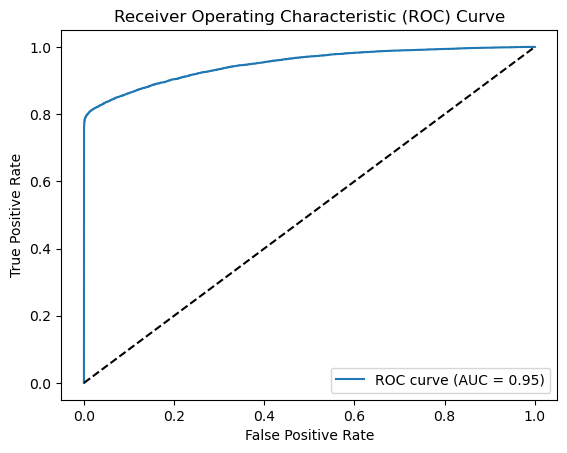

In [109]:
# Get the predicted probabilities for the positive class
yscores = best_model.predict_proba(xtest)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(ytest, yscores)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(ytest, yscores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [126]:
# Create a confusion matrix
cm_train = confusion_matrix(ytrain, y_pred_train_gs)

# Get the class labels from your data
labels = ['Class 0', 'Class 1']  # Replace with your class labels

# Create a DataFrame from the confusion matrix
cm_df_train = pd.DataFrame(cm_train, index=labels, columns=labels)

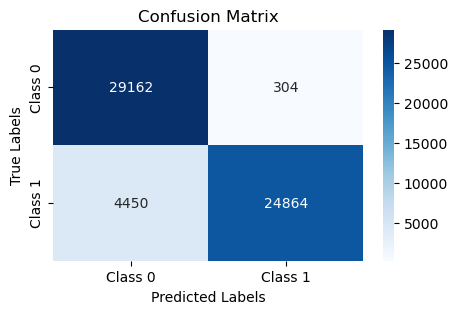

In [127]:
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [131]:
# Create a confusion matrix
cm_test = confusion_matrix(ytest, y_pred_test_gs)

# Class Labels
labels = ['Class 0', 'Class 1']

# Create a DataFrame from the confusion matrix
cm_df_test = pd.DataFrame(cm_test, index=labels, columns=labels)

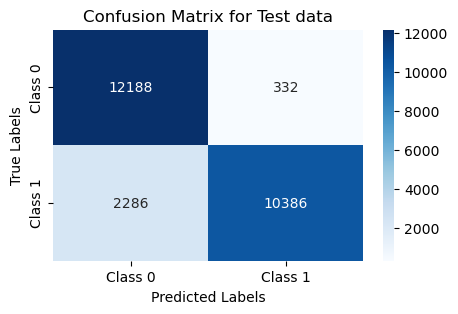

In [132]:
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [129]:
# Calculate True Positives (TP)
tp = cm_train[1, 1]

# Calculate False Positives (FP)
fp = cm_train[0, 1]

# Calculate True Negatives (TN)
tn = cm_train[0, 0]

# Calculate False Negatives (FN)
fn = cm_train[1, 0]

# Calculate Type 1 Error (False Positive Rate)
type1_error = fp / (fp + tn)

# Calculate Type 2 Error (False Negative Rate)
type2_error = fn / (fn + tp)

print('For Train data')
print("Type 1 Error (False Positive Rate):", type1_error)
print("Type 2 Error (False Negative Rate):", type2_error)

For Train data
Type 1 Error (False Positive Rate): 0.010316975497183195
Type 2 Error (False Negative Rate): 0.15180459848536534


# Feature Importance according to the Best Model

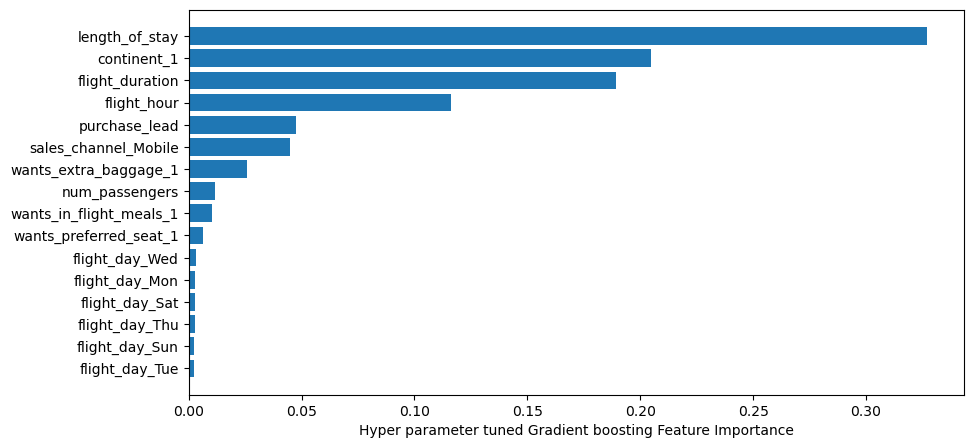

In [125]:
plt.figure(figsize=(10,5))
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(fdf.iloc[:,:-1].columns[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.xlabel("Hyper parameter tuned Gradient boosting Feature Importance")
plt.show()

# Insights

* We could conclude that passengers intending to stay for longer period of time are more likely to book a holiday with British Airways.
* Considering the fact that all the data is of Trip Type = 'Round Trip', It could probably mean that the overall fare prices are considerably affordable in British Airways compared to their competitors when booking a Round Trip.
* And that, most of the booking origin is from Asian countries.